# Type of variables

- Categorical:
    - Nominal (Man, woman),(Blue, red, yellow)
    - Ordinal (A,B,C), (Short, Median, Big)

- Numeric:
    - Discrete (1,2,3), (345 people)
    - Continue (Age, Height)

# Linear regression

`"The relation existence between variables"`

- Linear

    - Simple
    - Multiple

- Logistic
    - Simple
    - Multiple

keys:

1. It serves us mainly to be able to estimate one variable with respect to the other, it is the one that best fits the cloud of points.

2. Linear regression. It allows determining the degree of dependence of the series of values X and Y, predicting the estimated y value that would be obtained for a value x that is not in the distribution.

3. It allows predicting the behavior of a certain phenomenon since it efficiently approximates a certain amount of data

4. Predictive supervised data mining algorithm since the variables are numerical

5. The variable we want to forecast is the dependent variable and gives rise to further division

Simple linear regression is based on studying the changes in a non-random variable, which affect a random variable, in the case of a functional relationship between both variables that can be established by a linear expression, that is, its graphical representation is a straight line. That is, we are in the presence of a simple linear regression when an independent variable influences another dependent variable.

$$ y = f(x) $$


# The least squares method



The least squares method is a statistical method used to determine the equation of a regression. That is, the least squares method is a criterion that is used in a regression model to minimize the error obtained when calculating the regression equation.

Specifically, the least squares method consists of minimizing the sum of the squares of the residuals, or in other words, it is based on minimizing the sum of the squares of the differences between the values predicted by the regression model and the observed values.

## Estimation error

In statistics, the estimation error, also called residual, is the difference between the real value and the value fitted by the regression model. Therefore, a statistical residual is calculated as follows:

$$ e_i = {( y_i - \bar{y})} $$

## Minimize error squares

Now that we know what a residual is in statistics, it will be easier to understand how the squares of the errors are minimized.

The square of an error is the square of a residual, therefore, the square of an error is equal to the difference between the true value and the value fitted by the regression model raised to the power of two.

$$ e_i^2 = {( y_i - \bar{y})^2} $$

So: 

$$ e_i = [min] \sum_{i = 1}^{n}{( y_i - \bar{y})^2} $$


# Example 1 (Salary based on years of experience)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./datasets/Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
x = dataset.iloc[:,0].values 
y = dataset.iloc[:,1].values

In [4]:
x # Years of experience

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [5]:
y # Salary based on years of experience

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [6]:
# train and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=0)

In [7]:
x_train

array([ 2.9,  5.1,  3.2,  4.5,  8.2,  6.8,  1.3, 10.5,  3. ,  2.2,  5.9,
        6. ,  3.7,  3.2,  9. ,  2. ,  1.1,  7.1,  4.9,  4. ])

In [8]:
x_test

array([ 1.5, 10.3,  4.1,  3.9,  9.5,  8.7,  9.6,  4. ,  5.3,  7.9])

In [9]:
y_train

array([ 56642.,  66029.,  64445.,  61111., 113812.,  91738.,  46205.,
       121872.,  60150.,  39891.,  81363.,  93940.,  57189.,  54445.,
       105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [10]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [11]:
from sklearn.linear_model import LinearRegression
# Reshape independent variables
x_train_reshaped = np.array(x_train).reshape(-1,1)
x_test_reshaped = np.array(x_test).reshape(-1,1)
# Create linear regression model with x and y training sets
regression = LinearRegression()
regression.fit(x_train_reshaped, y_train)

LinearRegression()

In [12]:
# Prediction using x testing set
y_prediction_testing = regression.predict(x_test_reshaped) 
y_prediction_testing

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [13]:
# Comparison vs real data (testing set)
comp = pd.DataFrame({'Real':y_test, 'Prediction':y_prediction_testing, 'Years of experience':x_test})
comp

,Real,Prediction,Years of experience
0,37731.0,40835.105909,1.5
1,122391.0,123079.399408,10.3
2,57081.0,65134.556261,4.1
3,63218.0,63265.367772,3.9
4,116969.0,115602.645454,9.5
5,109431.0,108125.891499,8.7
6,112635.0,116537.239698,9.6
7,55794.0,64199.962017,4.0
8,83088.0,76349.687193,5.3
9,101302.0,100649.137545,7.9


### Training set visualization

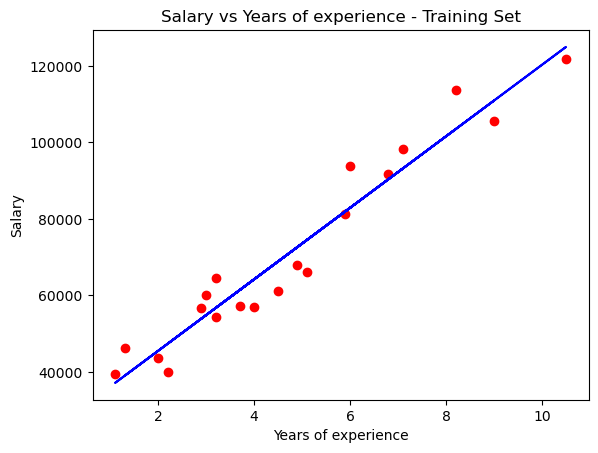

In [14]:
# real data training set
plt.scatter(x_train, y_train, color="red")
# linear regression
y_prediction_training = regression.predict(x_train_reshaped)
x_plot_train, y_plot_train = x_train, y_prediction_training
plt.plot(x_plot_train, y_plot_train, color="blue")
# Additional settings
plt.title("Salary vs Years of experience - Training Set")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

### Testing set visualization

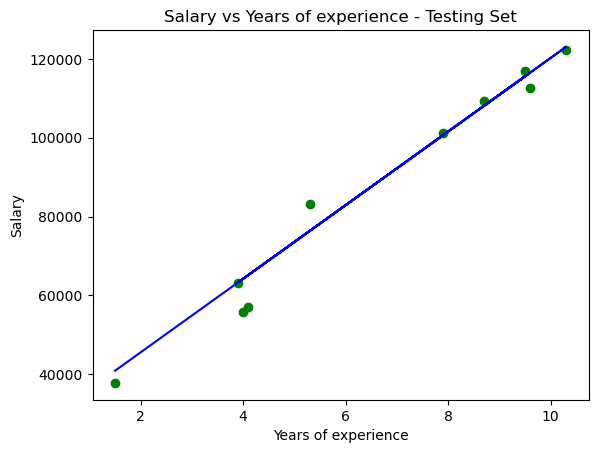

In [15]:
# Real data
plt.scatter(x=x_test, y=y_test, color="green")
# Linear regression
x_plot_test, y_plot_test = x_test, y_prediction_testing
plt.plot(x_plot_test, y_plot_test, color="blue")
# Additional settings
plt.title("Salary vs Years of experience - Testing Set")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

# Regression line of Y on X:

The regression line of Y on X is used to estimate the values of Y from those of X, for this reason the variable Y will be called a dependent variable.

**The slope of the line is the quotient between the covariance and the variance of the variable X**

$$ y - \bar{y} = \frac{S_{XY}}{S_{X}^2} * (x - \bar{x}) $$
$$ y  = (\frac{S_{XY}}{S_{X}^2})x - [(\frac{S_{XY}}{S_{X}^2})\bar{x} + \bar{y}]$$

# Regression line of X on Y:

The regression line of X on Y is used to estimate the values of X from those of Y, for this reason the varibale X will be called dependent varibale.

**The slope of the line is the quotient between the covariance and the variance of the variable Y**

$$ y - \bar{y} = \frac{S_{XY}}{S_{X}^2} * (x - \bar{x}) $$
$$ y  = (\frac{S_{XY}}{S_{X}^2})x - [(\frac{S_{XY}}{S_{X}^2})\bar{x} + \bar{y}]$$

What we want is to find a simple straight line of the form:

$$ y = mx + b $$



# Coefficient of determination (R squared)

The determination coefficient is defined as the proportion of the total variance of the variable explained by the regression. The coefficient of determination, also called R square, reflects the goodness of the fit of a model to the variable that it tries to explain.

It is important to know that the result of the coefficient of determination oscillates between 0 and 1. The closer its value is placed to 1, the greater the fit of the model to the variable that we are trying to explain. Conversely, the closer to zero, the less fitted the model will be and, therefore, the less reliable it will be.

It allows making predictions about the growth or variation of a given data according to how it is correlated with other variables. The R square is the indicator that will allow us to know how well these results can be predicted.

The greater the variance explained by the regression model, the closer the data points will be to the fitted regression line.

The following expression corresponds to the variance, but with two fundamental differences.

$$ R^2 = \frac{\sum_{t=1}^{T}}{\sum_{t=1}^{T}} $$



## Example 2 (Spending on a media for a particular product)

Ordinary Least Squares (OLS) using statsmodels library

In [16]:
import statsmodels.formula.api as sfm

In [17]:
data_set_advertising = pd.read_csv('./datasets/Advertising.csv')
data_set_advertising.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [18]:
# Building the model based on Data frame variables
linear_model_Sales_tv = sfm.ols(formula='Sales~TV', data=data_set_advertising).fit()
linear_model_Sales_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.47e-42
Time:                        19:36:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
linear_model_Sales_tv.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [20]:
a = linear_model_Sales_tv.params['Intercept']
b = linear_model_Sales_tv.params['TV']

7.032593549127695

### Predict linear model

$$ Sales = 7.032594 + 0.047537 * TV $$

### Regression coefficients

$$ \alpha = 7.032594 $$
$$ \beta = 0.047537  $$

### Visualization

The investment `($) `in the TV media publicity, 
you should expect a certain sales `($)`

Text(0.5, 1.0, 'TV vs Sales')

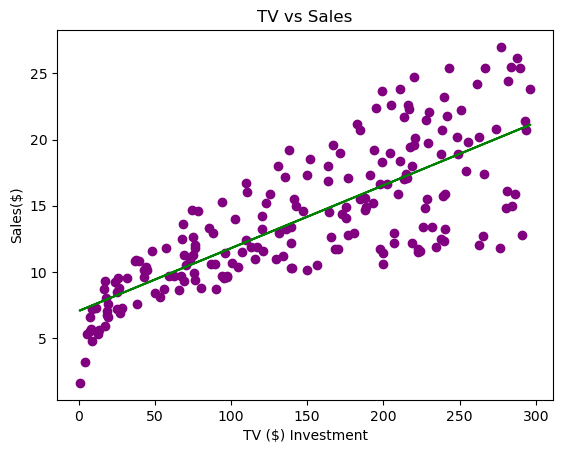

In [21]:
# Add points to plot
plt.scatter(data_set_advertising['TV'], data_set_advertising['Sales'], color='purple')
# Add line best fit to plot
x_plot_tv, y_plot_tv = data_set_advertising['TV'], (a+b*data_set_advertising['TV'])
plt.plot(x_plot_tv, y_plot_tv,color="green")
# Additional settings
plt.xlabel('TV ($) Investment')
plt.ylabel('Sales($)')
plt.title('TV vs Sales')